In [62]:
import numpy as np
csv_path = 'mtfuji_data.csv'
np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [64]:
print(fuji[0:10])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


# Problem 1

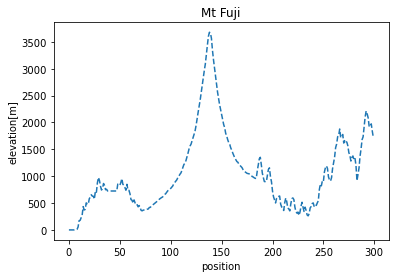

In [3]:
import matplotlib.pyplot as plt
plt.title('Mt Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:,0],fuji[:,3],ls='--')
plt.show()

# Problem 2

In [4]:
def compute_slope(point_number, mountain):
    """
        This function is used to calculate the slope of a given point 
        based on the relationship between the "current point number" and 
        the "the current point number-1"
        Input:
        point_number:
            the given point number
        mountain:
            data of a mountain ['point number', 'latitude', 'longtitude', 'elevation' and 'distance from point 0]'
        Output:
            slope of the point number
    """
    dif_x = mountain[point_number][0] - mountain[point_number-1][0]
    dif_y = mountain[point_number][3] - mountain[point_number-1][3]
    return dif_y/dif_x

# Compute the slope at point 130
slope_at_point130 = compute_slope(130,fuji)
print('The slope at point 130 is {}'.format(slope_at_point130))

The slope at point 130 is 137.30000000000018


# Problem 3

Destination point = current point-$\alpha$ x current point gradient

In [72]:
def compute_destination(current_point, mountain, alpha=0.2):
    gradient = compute_slope(current_point,mountain)
    result = round(current_point - alpha*gradient)
    assert(result > 0), 'There is no destination point with the current location'
    return result

destination = compute_destination(176,fuji)
print('Destination point of poit 17 is {}'.format(destination))

Destination point of poit 17 is 177


# Problem 4

In [73]:
def mountain_going_down(first_point, mountain,alpha=0.2):
    current_point = first_point
    result = [current_point]
    while True:
        next_point = compute_destination(current_point,mountain,alpha)
        if next_point == current_point or next_point in result:
            # Can not descend anymore or the next point is already visited
            break
        current_point = next_point
        result.append(next_point)
    return result

print('From point 136th, we can descend to following point: {}'.format(mountain_going_down(136,fuji)))

From point 136th, we can descend to following point: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


# Problem 5

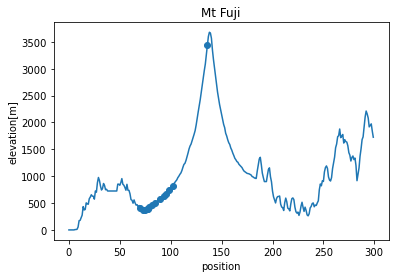

In [28]:
# The points moved along descending process are marked in the below cross section
plt.title('Mt Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
x = mountain_going_down(136,fuji)
plt.plot(fuji[:,0],fuji[:,3],marker='o', markevery=x)
plt.show()

# Problem 6

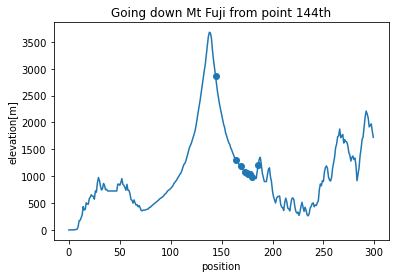

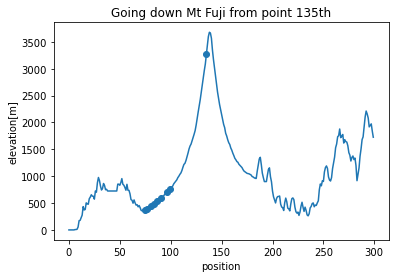

In [71]:
import random
# Calculate descending process for points from 130th to 150th and put al of result in 2-D jagged array
descending_path = [ mountain_going_down(np.int32(point),fuji) for point in fuji[130:150,0] ]
# Random point 1
random_point1 = random.choice(descending_path)
plt.title('Going down Mt Fuji from point {}th'.format(random_point1[0]))
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:,0],fuji[:,3],marker='o', markevery=random_point1)
plt.show()
# Random point 2
random_point2 = random.choice(descending_path)
plt.title('Going down Mt Fuji from point {}th'.format(random_point2[0]))
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:,0],fuji[:,3],marker='o', markevery=random_point2)
plt.show()

# Problem 7
I tried two values of alpha, small one is 0.05 and big one is 0.6. From the visualization, we can see that if alpha is small, many points have to be visited when going down the mountain. Meanwhile, if alpha is large, the points at every move will be drastically updated and it is hard to reach the minimum point of the mountain.

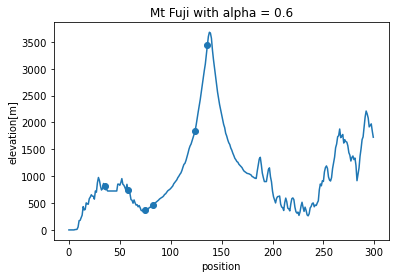

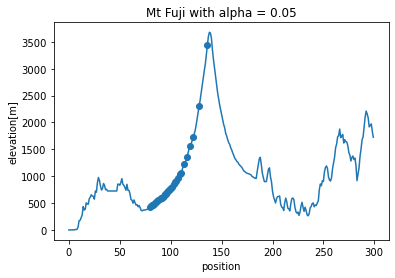

In [100]:
# Big alpha
alpha_big = 0.6
plt.title('Mt Fuji with alpha = {}'.format(0.6))
plt.xlabel('position')
plt.ylabel('elevation[m]')
x = mountain_going_down(136,fuji,alpha_big)
plt.plot(fuji[:,0],fuji[:,3],marker='o', markevery=x)
plt.show()
# Small alpha
alpha_small = 0.05
plt.title('Mt Fuji with alpha = {}'.format(alpha_small))
plt.xlabel('position')
plt.ylabel('elevation[m]')
x = mountain_going_down(136,fuji,alpha_small)
plt.plot(fuji[:,0],fuji[:,3],marker='o', markevery=x)
plt.show()